In [1]:
import pandas as pd
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pykalman import KalmanFilter
from array import *

In [2]:
path_to_data = 'E:/4 семестр/ГПО/РПАС/Данные СТМ Восточный Купол (от 29.01.17)/Куст 201/Скважина 2012.xlsx'

In [3]:
def get_df(path):
    df = pd.read_excel(path)
    df.rename(columns = {'Unnamed: 0' : 'Time Moment'}, inplace = True)
    df = df.drop(labels = [0], axis = 0) # удалить вторую строку оглавления
    #df=df.dropna()
    return df

In [4]:
def draw_4_graphs(df):
    plt.figure(figsize=(22, 20))
    i = 1
    
    for col_name, data in df.items():
        if i != 1:
            plt.subplot(4, 1, i-1)
            #plt.plot(df['Time Moment'].values, data.values, '-')
            plt.plot(df['Time Moment'] , data, '-')
            plt.xlabel('Time Moment')
            plt.ylabel(col_name)
            #plt.xticks(rotation = 45)
            plt.title(col_name)
        i+=1

    plt.show()

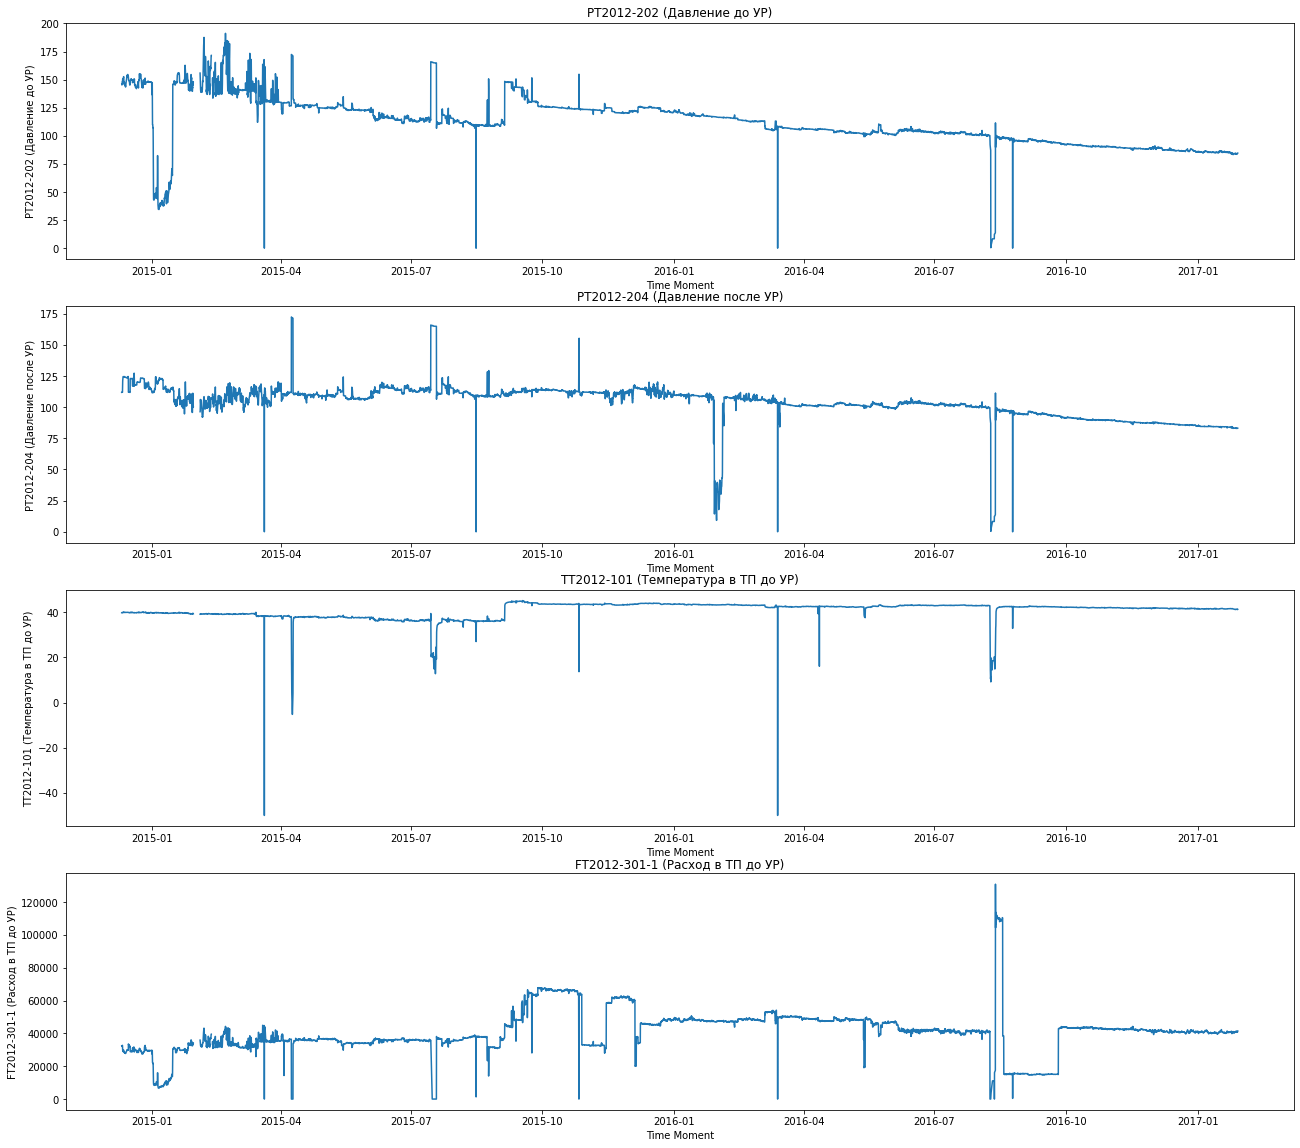

In [5]:
df=get_df(path_to_data)
draw_4_graphs(df)

In [67]:
def set_point(df):
    plt.figure(figsize=(30, 5))
    columns = list(df.columns[1:])
    i=1
    a=[]
    b=[]
    c=[]
    x=[]
    y=[]
    for i in range(df.index[-1]):
        if((df[columns[0]].values[i]-df[columns[0]].values[i-1]>(df[columns[0]].values[i-1])*0.1)and
           (df[columns[1]].values[i]-df[columns[1]].values[i-1]>(df[columns[1]].values[i-1])*0.1)):
            x.append(df[columns[0]].values[i])
            a.append(df[columns[1]].values[i])
            b.append(df[columns[2]].values[i])
            c.append(df[columns[0]].values[i])
            y.append(df['Time Moment'].values[i])
    plt.plot(df['Time Moment'] , df[columns[0]], '-')
    plt.xlabel('Time Moment')
    plt.ylabel(columns[0])
    plt.title(columns[0])
    plt.scatter(y,x, c = 'r')        

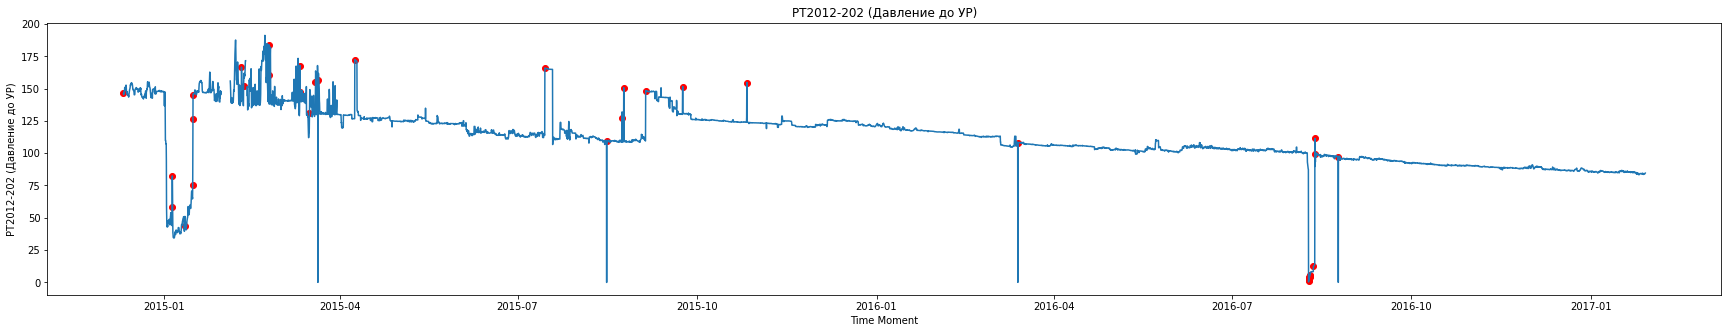

In [68]:
df=get_df(path_to_data)
set_point(df)

In [73]:
def set_point1(df):
    plt.figure(figsize=(30, 5))
    columns = list(df.columns[1:])
    i=1
    x=[]
    y=[]
    for i in range(df.index[-1]):
        if(df[columns[3]].values[i]-df[columns[3]].values[i-1]>=(df[columns[3]].values[i-1])*0.5):
            x.append(df[columns[3]].values[i])
            y.append(df['Time Moment'].values[i])
    plt.plot(df['Time Moment'] , df[columns[3]], '-')
    plt.xlabel('Time Moment')
    plt.ylabel(columns[3])
    plt.title(columns[3])
    plt.scatter(y,x, c = 'r')       

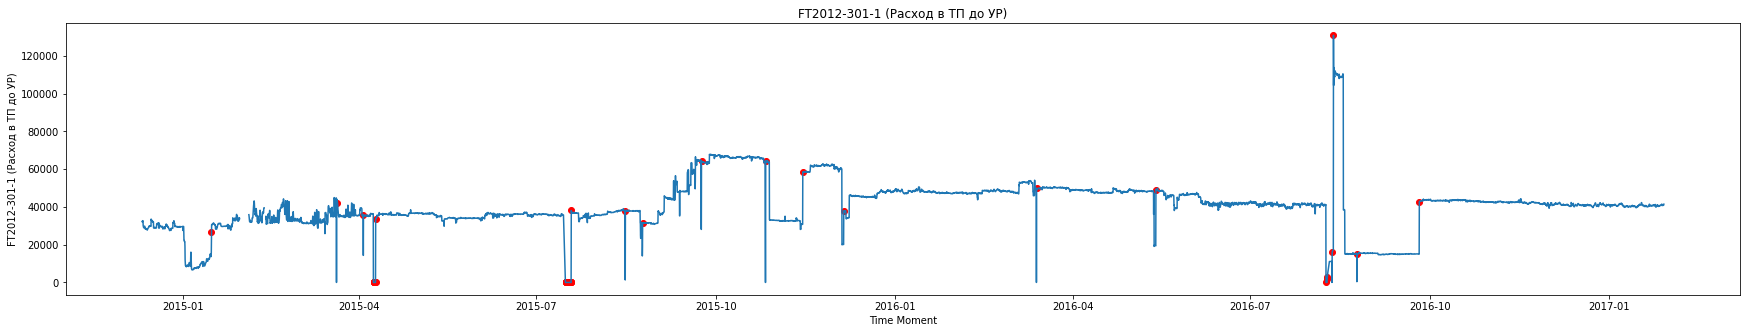

In [74]:
df=get_df(path_to_data)
set_point1(df)